<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/convertRGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

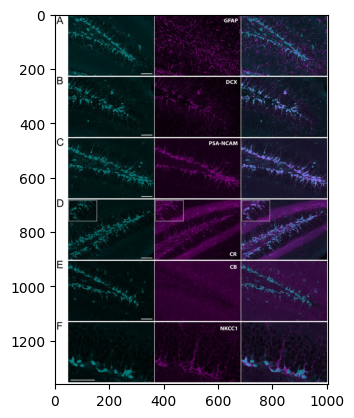

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
def rgb_cmy(image,caxis=2,balance = [1,1,1]):
    import numpy as np
    import matplotlib as mpl
    

    image = mpl.image.imread(image)
    image = np.moveaxis(image, caxis, 2)

    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]


    CYM_r = np.zeros_like(image)
    CYM_r[:,:,0] = image_R
    CYM_r[:,:,2] = image_R
    CYM_r = CYM_r/np.max(CYM_r.flatten())

    CYM_g = np.zeros_like(image)
    CYM_g[:,:,1] = image_G
    CYM_g[:,:,2] = image_G
    CYM_g = CYM_g/np.max(CYM_g.flatten())

    CYM_b = np.zeros_like(image)
    CYM_b[:,:,0] = image_B
    CYM_b[:,:,1] = image_B
    CYM_b = CYM_b/np.max(CYM_b.flatten())

    merge_cym = CYM_r*balance[0] + CYM_g*balance[1] + CYM_b*balance[2]
    merge_cym = merge_cym/np.max(merge_cym)
    mpl.pyplot.imshow(merge_cym)
    mpl.pyplot.show()
    from PIL import Image
    img = Image.fromarray(np.uint8(merge_cym*255), 'RGB')
    img = img.save("merge_cym.jpg")
    from google import colab
    colab.files.download('merge_cym.jpg')
    return merge_cym

pic = '/content/pone_0041029_pdf (1).jpg'

conv_img = rgb_cmy(pic,caxis=2,balance = [2,2,2])
